In [3]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
file_path = r"C:/Users/cheti/OneDrive/Desktop/Amazon product review sentiment analysis 1.csv"
df = pd.read_csv(file_path)

# Step 2: Display basic info
print("Initial Shape:", df.shape)
print("\nColumn Info:\n", df.info())
print("\nFirst Few Rows:\n", df.head())

# Step 3: Remove Duplicates
df = df.drop_duplicates()
print("\nAfter removing duplicates:", df.shape)

# Step 4: Handle Missing Values
missing_summary = df.isnull().sum()
print("\nMissing Values Summary:\n", missing_summary)

# Fill or drop missing values (strategy depends on context)
df = df.dropna()  # Simple option: drop all rows with any missing values
# Alternatively: df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Step 5: Fix Data Types
# Example: Convert date columns if any (modify as needed)
# df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

# Step 6: Remove Extra Whitespace from String Columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Step 7: Standardize Categorical Columns
# Example: Normalize "Sentiment" column if it exists
if 'Sentiment' in df.columns:
    df['Sentiment'] = df['Sentiment'].str.lower().str.capitalize()

# Step 8: Remove Irrelevant or Unnamed Columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Step 9: Outlier Detection (example for numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"Outliers in {col}: {len(outliers)}")

# Step 10: Final DataFrame Summary
print("\nCleaned Data Shape:", df.shape)
print("\nCleaned Data Sample:\n", df.head())

# Step 11: Save Cleaned Dataset
df.to_csv("cleaned_amazon_reviews.csv", index=False)
print("\nCleaned data saved to 'cleaned_amazon_reviews.csv'")


Initial Shape: (2366, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        2366 non-null   object
 1   customer_id        2366 non-null   int64 
 2   review_id          2366 non-null   object
 3   product_id         2366 non-null   object
 4   product_parent     2366 non-null   int64 
 5   product_title      2366 non-null   object
 6   product_category   2366 non-null   object
 7   star_rating        2366 non-null   int64 
 8   helpful_votes      2366 non-null   int64 
 9   total_votes        2366 non-null   int64 
 10  vine               2366 non-null   object
 11  verified_purchase  2366 non-null   object
 12  review_headline    2365 non-null   object
 13  review_body        2365 non-null   object
 14  review_date        2366 non-null   object
 15  sentiment          2366 non-null   int64 
dtypes: int64(6), obj

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = r"C:/Users/cheti/OneDrive/Desktop/Amazon product review sentiment analysis 1.csv"
df = pd.read_csv(file_path)

# Step 1: Remove duplicates
df = df.drop_duplicates()

# Step 2: Drop rows with missing values
df = df.dropna()

# Step 3: Strip whitespace from string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Step 4: Standardize and encode sentiment column
if 'sentiment' in df.columns:
    df['sentiment'] = df['sentiment'].astype(str).str.lower().str.capitalize()
    label_encoder = LabelEncoder()
    df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Step 5: Combine text fields
df['text'] = df['review_headline'] + " " + df['review_body']

# Step 6: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])

# Step 7: Define target variable
y = df['sentiment']

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 9: Show some outputs
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training label distribution:\n", y_train.value_counts())
print("Test label distribution:\n", y_test.value_counts())
print("Sample features:", vectorizer.get_feature_names_out()[:10])


Training data shape: (1891, 4736)
Test data shape: (473, 4736)
Training label distribution:
 sentiment
1    1495
0     396
Name: count, dtype: int64
Test label distribution:
 sentiment
1    369
0    104
Name: count, dtype: int64
Sample features: ['00' '000' '01' '02' '04' '05' '06' '07' '08' '09']


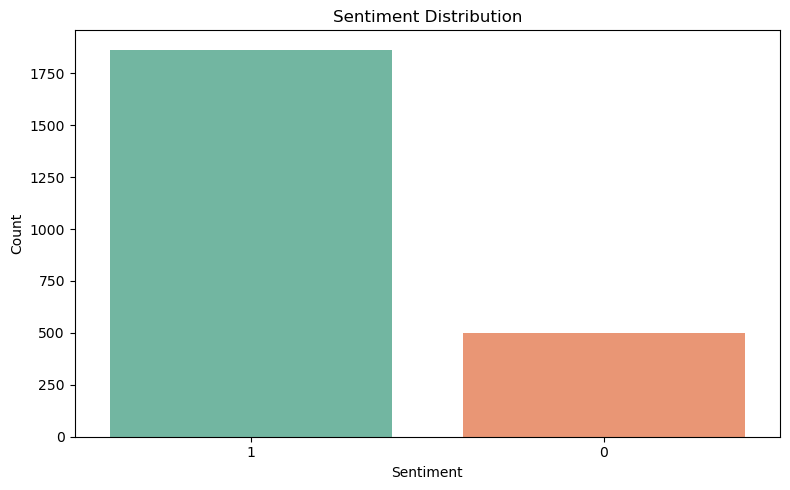

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:/Users/cheti/OneDrive/Desktop/Amazon product review sentiment analysis 1.csv")

# Remove duplicates and missing values
df = df.drop_duplicates()
df = df.dropna()

# Strip whitespace from strings
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Standardize sentiment column
df['sentiment'] = df['sentiment'].astype(str).str.lower().str.capitalize()

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
